![ROOT Logo](http://root.cern.ch/img/logos/ROOT_Logo/website-banner/website-banner-%28not%20root%20picture%29.jpg)
![Spark Logo](http://spark-mooc.github.io/web-assets/images/ta_Spark-logo-small.png)
# **DistROOT: Example Notebook**
<hr style="border-top-width: 4px; border-top-color: #34609b;">

Import the necessary packages.

In [1]:
import ROOT
from DistROOT import DistTree

Welcome to JupyROOT 6.08/06


Define the mapper and reducer functions.

In [2]:
%%cpp -d

TH2F* fillHist(TTreeReader& reader) {
    auto px = TTreeReaderValue<float>(reader, "px");
    auto py = TTreeReaderValue<float>(reader, "py");
    
    TH2F *h = new TH2F("hpxpy", "py vs px", 40, -4, 4, 40, -4, 4);
    while (reader.Next()) {
        h->Fill(*px, *py);
    }
    
    return h;
}

TH2F* mergeHist(TH2F *h1, TH2F *h2) {
    h1->Add(h2);
    return h1;
}

Build the DistTree and trigger the parallel processing.

In [3]:
dTree = DistTree(filelist = ["http://root.cern.ch/files/test_distroot_small.root"],
                 treename = "test",
                 npartitions = 2)

myHist = dTree.ProcessAndMerge(ROOT.fillHist, ROOT.mergeHist)

Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
17/03/28 12:39:17 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
17/03/28 12:39:17 WARN Utils: Your hostname, ubuntu-me resolves to a loopback address: 127.0.1.1; using 10.123.50.216 instead (on interface wlp5s0)
17/03/28 12:39:17 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Plot the resulting histogram.

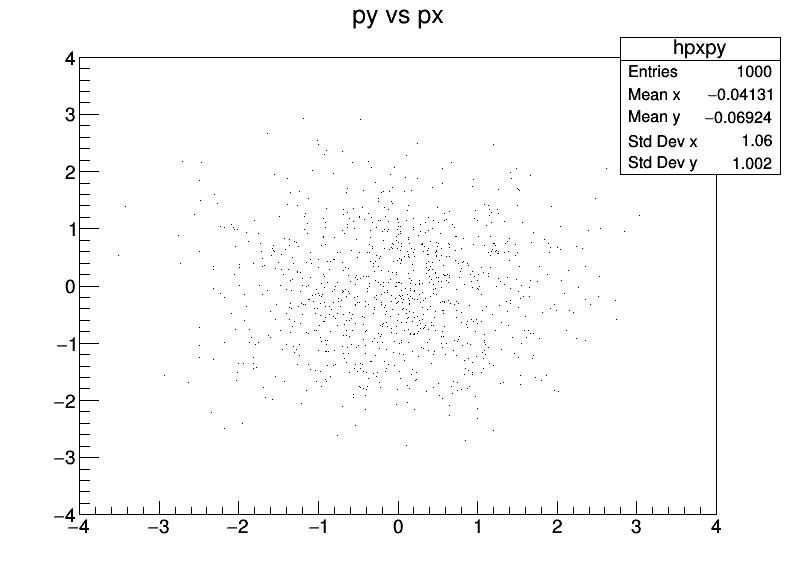

In [4]:
c = ROOT.TCanvas("myCanvas", "Test Histogram", 800, 600)
myHist.Draw()
c.Draw()